# LDA
LDA = Linear Discriminant Analysis, liniowa analiza dyskryminacyjna.

Stanowi algorytm klasyfikacyjny, ale w trakcie uczenia wykrywa on njbardziej charakterystyczne osie pomiędzy klasami, dzięki którym jesteśmy w stanie zdefiniować hiperpłaszczyznę rzutowania danych. Zaletą tego rozwiązania jest maksymalne możliwe rozdzielenie klas, zatem analiza LDA stanowi dobry sposób redukowania wymiarowości przed uruchomieniem innego algorytmu klasyfikującego, np. maszyny SVM.
(na podstawie: Aurelien Geron, Uczenie maszynowe z użyciem Scickit-Learn i TensorFlow)

## Kolejne elementy implementacji LDA:
* [Wprowadzenie](#LDA_INIT)
* [Przetwarzanie danych](#LDA_DATAPROCESSING)
* [Proces wizualizacji](#LDA_VISUALISATION)
* [Finalny rozklad próbek](#LDA_SUMMARY)

<a id='LDA_INIT'></a>
## Wprowadzenie
Aby przeprowadzdzić wizualizacje LDA, wykorzystliśmy zbiór 'wine'. Posiada on 178 próbek trzech klas opisanych poprzez 14 składowych. W przypadku naszej analizy zmienną objaśnianą jest rodzaj wina. Wizualizacja pierwotnego zbioru danych byłaby niemożliwa / nie dająca możliwości analizy ze względu na dużą liczbę wymiarów. Pobieranie danych i ich tabelaryczna prezentacja zostały zaimplementowane w trzech kolejnych blokach.

## Instalacja używanych pakietów

In [2]:
library(ggfortify)
library(factoextra)
library(ggplot2)
library(MASS)
library(car)

Loading required package: ggplot2
Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [3]:
  UCI <- "http://archive.ics.uci.edu/ml"
  REPOS <- "machine-learning-databases"
  wine.url <- sprintf("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
  wine <- read.csv(wine.url, header=FALSE) 
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
  wine$Type <- as.factor(wine$Type)
#   save(wine, file="wine.Rdata", compress=TRUE)

In [4]:
wine

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


<a id='LDA_DATAPROCESSING'></a>
## Przetwarzanie danych

Wyżej przedstawiony zbiór danych zostanie poddany procesowi liniowej analizy dyskryminacyjnej (LDA). Celem liniowej analizy dyskryminacyjnej jest odnalezienie takich kombinacji zmiennych, aby uzyskać jak najlepszą separację grup. Do tego celu wykokrzystana został funkcja `lda` z pakietu `MASS`.

In [5]:
library(MASS)
library(car)

In [17]:
lda_res <- lda(Type ~., data = wine)
lda_res

Call:
lda(Type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0.3314607 0.3988764 0.2696629 

Group means:
   Alcohol    Malic      Ash Alcalinity Magnesium  Phenols Flavanoids
1 13.74475 2.010678 2.455593   17.03729  106.3390 2.840169  2.9823729
2 12.27873 1.932676 2.244789   20.23803   94.5493 2.258873  2.0808451
3 13.15375 3.333750 2.437083   21.41667   99.3125 1.678750  0.7814583
  Nonflavanoids Proanthocyanins    Color       Hue Dilution   Proline
1      0.290000        1.899322 5.528305 1.0620339 3.157797 1115.7119
2      0.363662        1.630282 3.086620 1.0562817 2.785352  519.5070
3      0.447500        1.153542 7.396250 0.6827083 1.683542  629.8958

Coefficients of linear discriminants:
                         LD1           LD2
Alcohol         -0.403399781  0.8717930699
Malic            0.165254596  0.3053797325
Ash             -0.369075256  2.3458497486
Alcalinity       0.154797889 -0.1463807654
Magnesium       -0.002163496 -0.0004627565
Ph

Funkcja dyskryminacyjna (kombinacja liniowa cech):

-0.403 * Alcohol + 0.165 * Malic - 0.369 * Ash + 0.155 * Alcalinity - 0.002 * Magnesium + 0.618 * Phenols - 1.66 * Flavanoids - 1.496 * Nonflavanoids + 0.134 * Proanthocyanins + 0.355 * Color - 0.818 * Hue - 1.15 * Dilution - 0.003 * Proline

<a id='LDA_VISUALISATION'></a>
## Proces wizualizacji

### LDA

Aby przedstawić wyniki liniowej analizy dyskryminacyjnej na histogramach wykorzystano funkcję `ldahist`. 

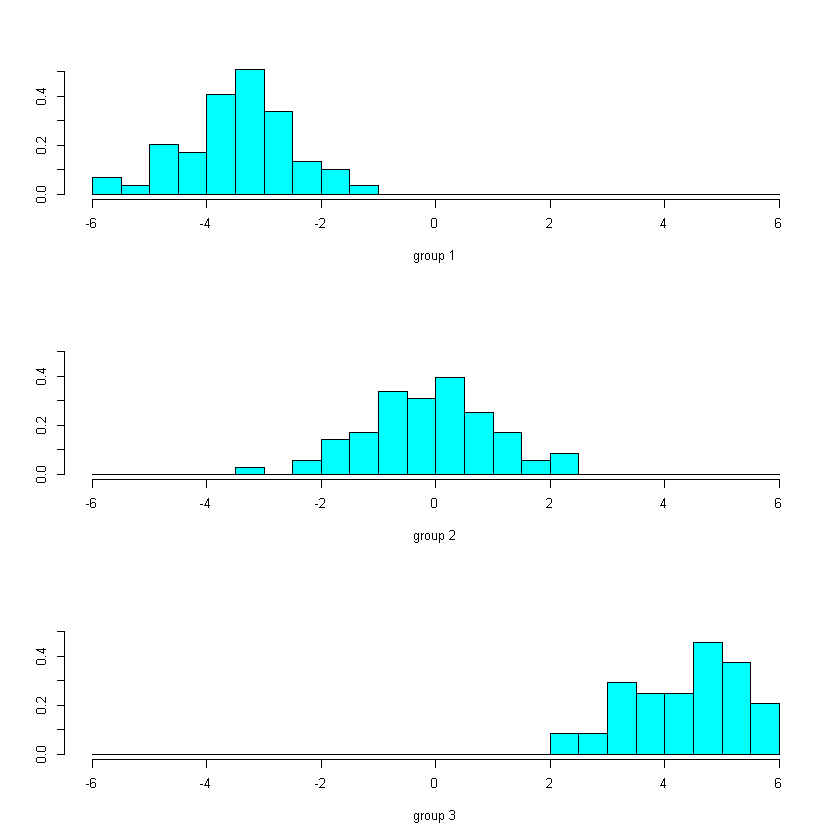

In [7]:
lda_res.values <- predict(lda_res)
ldahist(lda_res.values$x[,1], g = wine$Type)


Histogramy dla drugiej funkcji dyskryminacji.

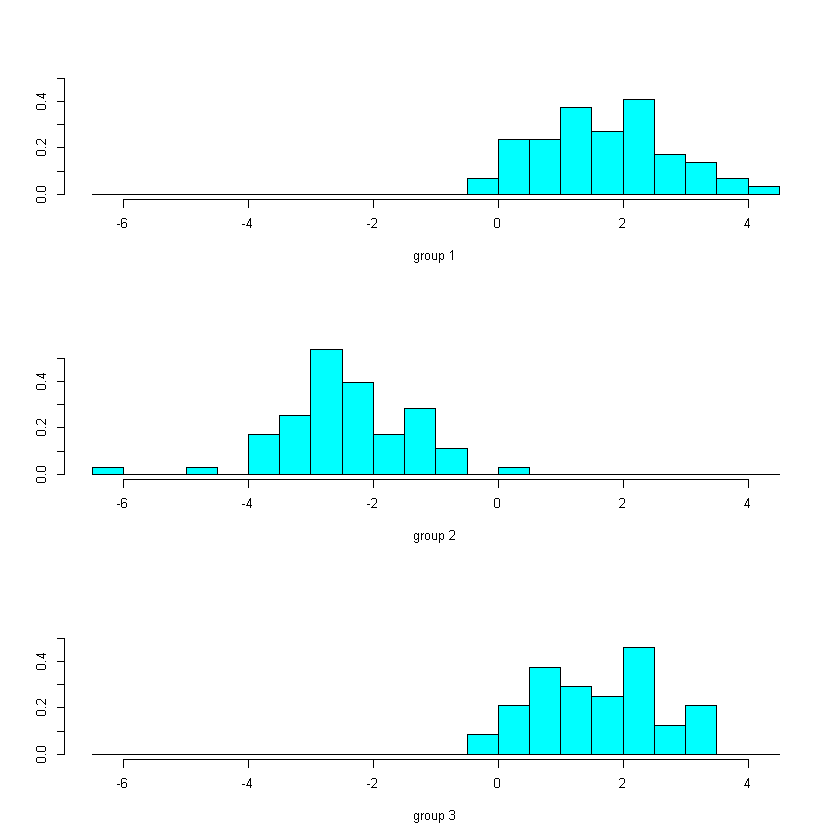

In [8]:
ldahist(lda_res.values$x[,2], g = wine$Type)

Wykres punktowy funkcji dyskryminacji.

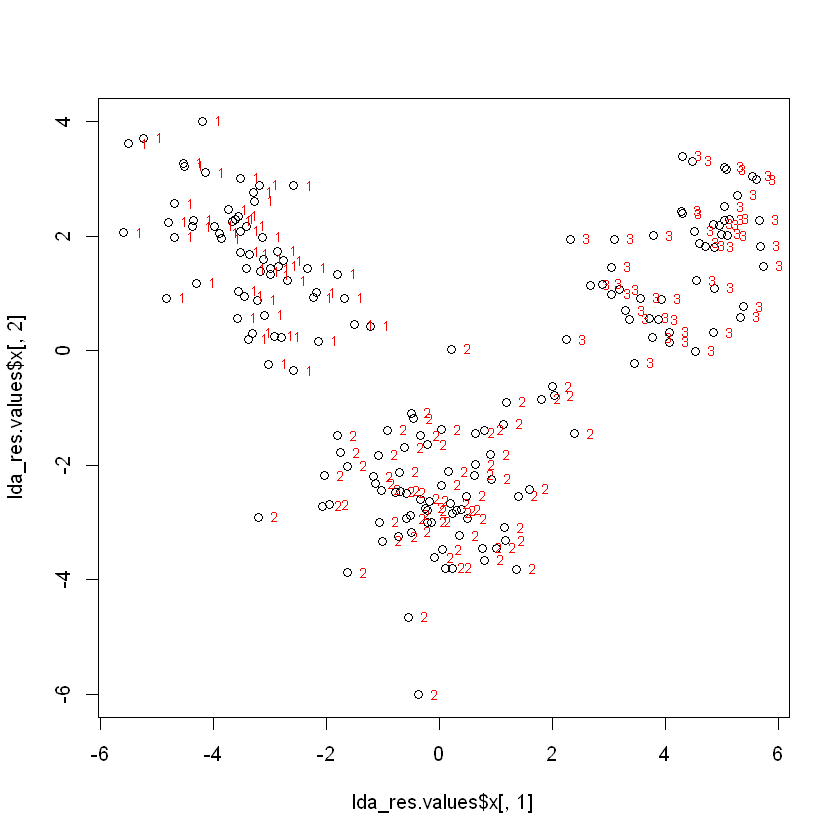

In [9]:

plot(lda_res.values$x[,1], lda_res.values$x[,2])
text(lda_res.values$x[,1], lda_res.values$x[,2], wine$Type, cex = 0.7, pos = 4, col = "red")

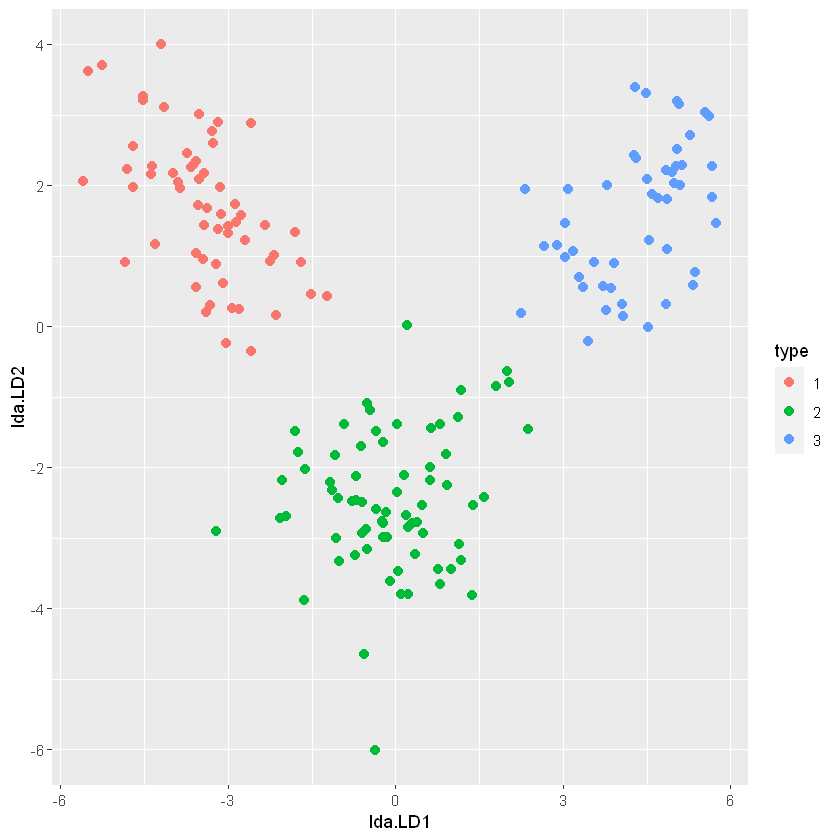

In [10]:
newdata <- data.frame(type = wine[,1], lda = lda_res.values$x)
library(ggplot2)
ggplot(newdata) + geom_point(aes(lda.LD1, lda.LD2, colour = type), size = 2.5)


# kmeans

Proces klasteryzacji danych został przeprowadzony przy pomocy algorytmu k-średnich. Wykorzystany do tego został pakiet `factoextra`. Do oceny jakości uzyskanych w procesie klasteryzacji wyników wykorzystano pakiet `clValid`.

In [27]:
library("factoextra")
library(clValid)

Jako liczbę centroidów (klastrów) przyjęto 3, gdyż tyle wynosi liczba klas w analizowanym zbiorze. Do określenia liczby klastrów można wykorzystać byłoby także metodę łokciową.

In [31]:
# Compute k-means with k = 3
set.seed(123)
wine_scale_data = scale(lda_res.values$x) 
wine_not_scale_data = lda_res.values$x
kmeans_scale <- kmeans(wine_scale_data, 3, nstart = 25)
kmeans_not_scale <- kmeans(wine_not_scale_data, 3, nstart = 25)
# K-means clusters showing the group of each individuals
kmeans_scale$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  3   3   3   3   3   3   3   3   3   3   1   1   1   1   1   1   1   1   1   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

In [13]:
# dunn(clusters = res.km$cluster, Data = scale(wine[,2:14]))

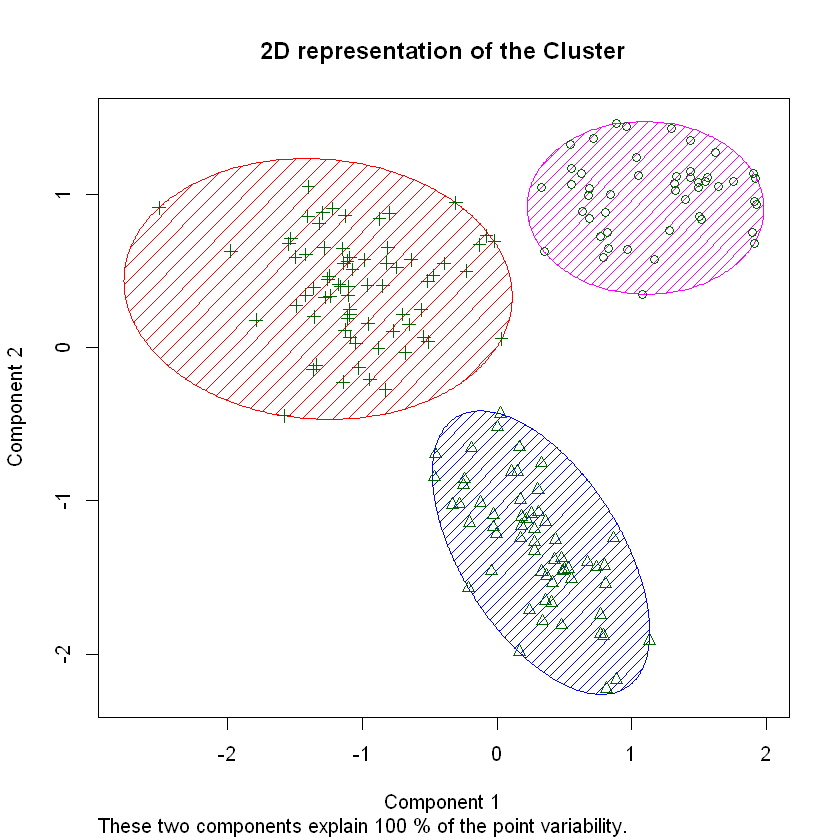

In [32]:
clusplot(wine_scale_data, kmeans_scale$cluster, main='2D representation of the Cluster',
         color=TRUE, shade=TRUE,
         lines=0)

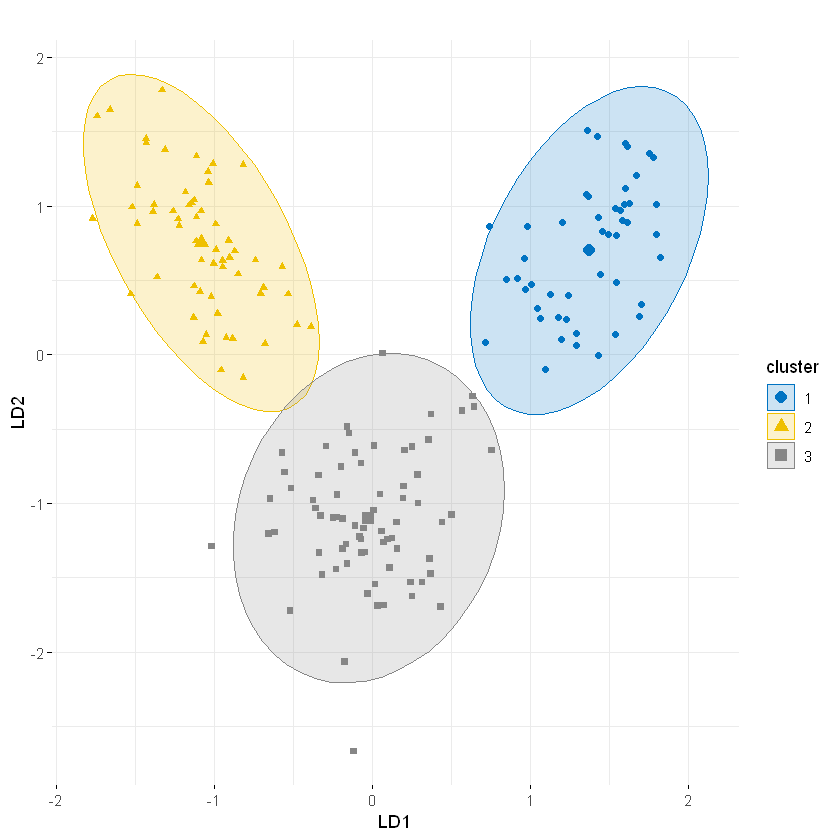

In [33]:
fviz_cluster(object = kmeans_scale, # kmeans object 
             data = wine_scale_data, # data used for clustering
             ellipse.type = "norm",
             geom = "point",
             palette = "jco",
             main = "",
             ggtheme = theme_minimal())

## Index dunna

Jako indeks wewnętrzny do oceny wyników klasteryzacji wykorzystaliśmy indeks Dunna. Jest to ocena wewnętrzna, gdyż przeprowadzona została na podstawie danych poddanych grupowaniu z użyciem funkcji oceny.

Oczekiwana jest mała odległość wewnątrz grupy (mianownik mały) i duża odległość pomiędzy grupami, stąd większe wartości są lepsze.

In [39]:
dunn(clusters = kmeans_scale$cluster, Data = wine_scale_data)

[1] 0.1391473

Uzyskana wartość indeksu byłaby wyższa, gdyby obserwacje wewnątrz klastrów były bardziej skupione. Odległości między grupami nie są duże, grupy częściowo się pokrywają, stąd stosunkowo niska wartość wskaźnika wewnętrznego.

In [36]:
lda_res.values

1,2,3
1.0000000,3.261633e-09,3.641123e-18
0.9999996,3.583115e-07,8.733373e-17
0.9999977,2.321357e-06,7.823824e-14
1.0000000,3.726442e-12,1.334086e-16
0.9251179,7.488190e-02,2.171038e-07
1.0000000,3.509635e-11,1.291915e-17
1.0000000,2.700215e-11,1.200162e-17
1.0000000,1.905769e-10,2.304906e-16
0.9999999,6.006630e-08,2.436593e-15
0.9999990,9.839361e-07,1.156433e-13


In [40]:
dunn(clusters = kmeans_not_scale$cluster, Data = wine_not_scale_data)

[1] 0.1417283

# Ocena klasteryzacji - index zewnętrzny

Oceny klasteryzacji dokonano tekże przy pomocy indeksu zewnętrznego, czyli dokonano oceny na podstawie danych które nie były użyte do grupowania w postaci znanych etykiet klas reprezentującyh ground truth (zmienna objaśniana).

In [41]:
kmeans_scale$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   3 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  3   3   3   3   3   3   3   3   3   3   1   1   1   1   1   1   1   1   1   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1

Etykiety klastrów zostały dostosowane do etykiet ze zbioru danych `wines`.

In [42]:
# change cluster indexes order to match the indexes/types order from wines dataset
kmeans_scale$cluster <- kmeans_scale$cluster - 1
kmeans_scale$cluster[kmeans_scale$cluster == 0] <- 3
kmeans_scale$cluster

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3

Widzimy "na oko", że skuteczność klasteryzacji jest wysoka (wiemy, że obserwacje w zbiorze danych były posortowane po wartości zmiennej objaśnianej).

# Accuracy, Precission i Recall (confusion matrix etc)

Na podstawie : https://danushka.net/lect/dm/Clustering - strona 30

In [43]:
confusion_matrix <- matrix(0,2,2)
confusion_matrix

0,0
0,0


In [44]:
one_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 1 ])
one_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 1 ])
one_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 1 ])
two_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 2 ])
two_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 2 ])
two_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 2 ])
three_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 3 ])
three_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 3 ])
three_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 3 ])

In [94]:
cluster_one_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1])
cluster_two_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2])
cluster_three_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3])

In [95]:
TPFP <- choose(cluster_one_size, 2) + 
choose(cluster_two_size, 2) + 
choose(cluster_three_size, 2)

TPFP

[1] 5246

In [96]:
TP <- choose(one_in_one, 2) + choose(one_in_two, 2) + choose(one_in_three, 2) + 
    choose(two_in_one, 2) + choose(two_in_two, 2) + choose(two_in_three, 2) + 
    choose(three_in_one, 2) + choose(three_in_two, 2) + choose(three_in_three, 2)

TP

[1] 4925

In [97]:
FP <- TPFP - TP
FP

[1] 321

In [98]:
TNFN <- cluster_one_size * cluster_two_size + cluster_one_size * cluster_three_size + cluster_two_size * cluster_three_size
TNFN

[1] 10507

In [99]:
FN <- one_in_one * one_in_two + one_in_one * one_in_three + one_in_two * one_in_three +
    two_in_two * two_in_one + two_in_two * two_in_three + two_in_one * two_in_three +
    three_in_three * three_in_one + three_in_three * three_in_two + three_in_one * three_in_two

FN


[1] 399

In [100]:
TN <- TNFN - FN
TN

[1] 10108

In [101]:
confusion_matrix[1,1] <- TP
confusion_matrix[1,2] <- FN
confusion_matrix[2,1] <- FP
confusion_matrix[2,2] <- TN

confusion_matrix

4925,399
321,10108


In [102]:
# Rand Index (RI)
RI <- (TP + TN)/(TP+FP+TN+FN)
RI

[1] 0.9542944

In [103]:
#Precision
precision <- TP / (TP + FP)
precision

[1] 0.9388105

In [104]:
# Recall 
recall <- TP / (TP + FN)
recall

[1] 0.9250563

In [105]:
# F-measure
f_measure = 2*precision*recall / (precision+recall)
f_measure

[1] 0.9318827

# Podsumowanie

Liniowa analiza dyskryminacyjna jest niezwykle przydatna przy analizie i wizualizacji wielowymiarowych zbiorów danych. Dzięki dostępnym w R pakietom można dokonać jej szybko i łatwo, a wyniki analizy za pomocą kilku komend przedstawić w formie przejrzystych wykresów.

# Wartościowe linki

## LDA
https://rpubs.com/ifn1411/LDA

https://rstudio-pubs-static.s3.amazonaws.com/386394_19c4d87014ec4d8c81d26bb1f8090bf7.html

https://www.andreaperlato.com/mlpost/linear-discriminant-analysis/

https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b



## kmeans

https://rstudio-pubs-static.s3.amazonaws.com/542882_1caaeaa4c74945cb87a3483282cc31cd.html

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means\

https://www.datanovia.com/en/blog/k-means-clustering-visualization-in-r-step-by-step-guide/